In [1]:
import numpy as np
import numpy.linalg as algl
import matplotlib.pyplot as plt
import IPython.display as ipd


[0.000e+00 1.000e-04 2.000e-04 ... 9.997e-01 9.998e-01 9.999e-01]
10000


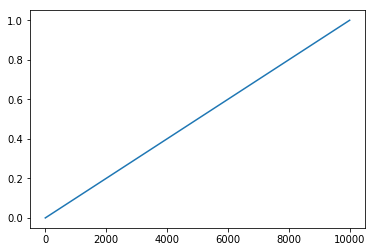

In [2]:
dt = 0.0001
tan = np.arange(0, 1, dt)
print(tan)
print(len(tan))
plt.plot(tan)
plt.show()

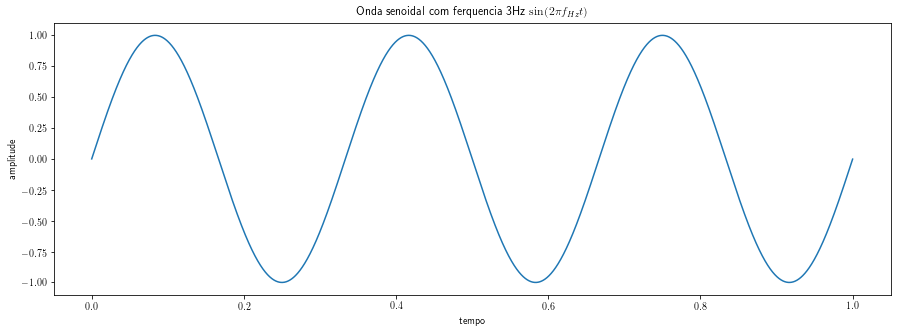

In [3]:
freq = 3.

x = np.sin(2*np.pi*freq*tan)


plt.rcParams['text.usetex'] = True #print(rcParams)
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(tan, x)
plt.title("Onda senoidal com ferquencia 3Hz $\sin(2\pi f_{Hz}t)$")
plt.xlabel('tempo')
plt.ylabel('amplitude')
plt.show()

In [4]:
def amostrarSinal(sig, t, T):
    """T deve ser inteiro"""
    
    t_amostrado = t[0:len(t):T]
    sig_amostrado = sig[0:len(sig):T]
    
    plt.plot(t, sig)
    
    plt.plot(t_amostrado, sig_amostrado, '.', color='r', ms=8)
    plt.show()
    
    return sig_amostrado, t_amostrado

200


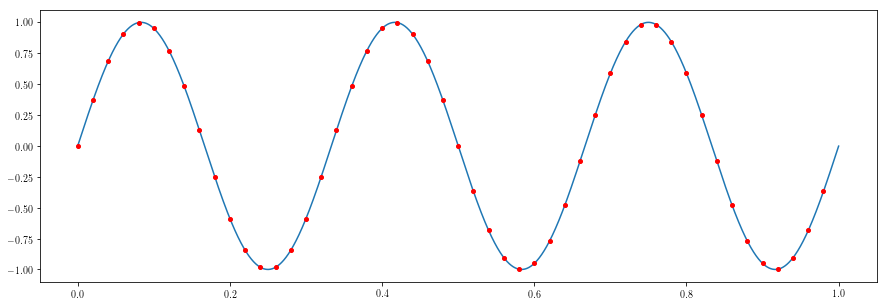

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

In [5]:
SR1 = int(1/dt)
SR2 = 50
T  = int(SR1/SR2)
print(T)

(xa, ta) = amostrarSinal(x, tan, T)
ta

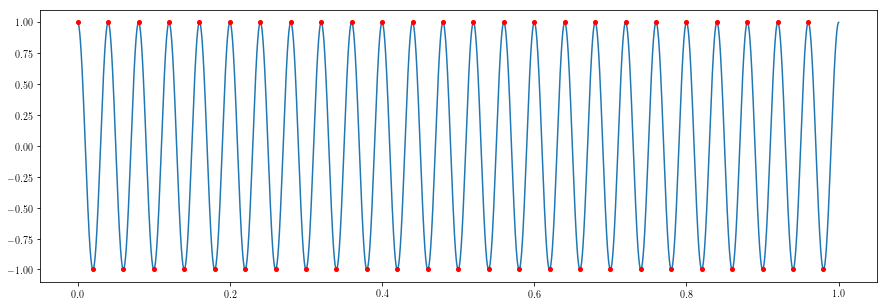

In [8]:
freq_1 = 25
x_1 = np.sin(2*np.pi*freq_1*tan + np.pi/2)
(xs_1, ts_1) = amostrarSinal(x_1, tan, T)

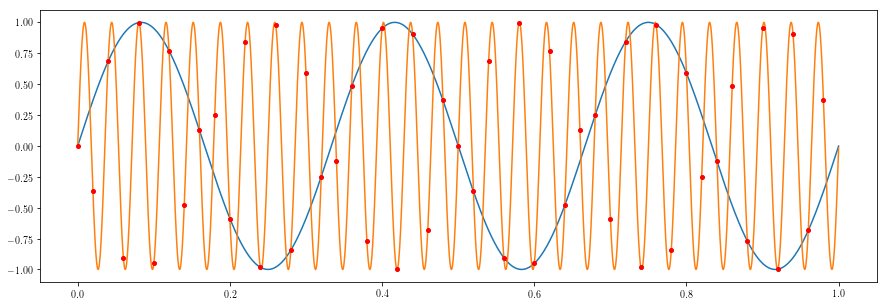

In [9]:
freq_2 = 28
x_2 = np.sin(2*np.pi*freq_2*tan)
plt.plot(tan, x)
(xs_2, ts_2) = amostrarSinal(x_2, tan, T)


# Exercicio 

- gere um sinal audivel, ,ou seja, na faixa entre 20Hz e 20kHz (de preferencia, entre 300 Hz e 1000Hz) com taxa de amostragem 8192 que dure 3 segundos

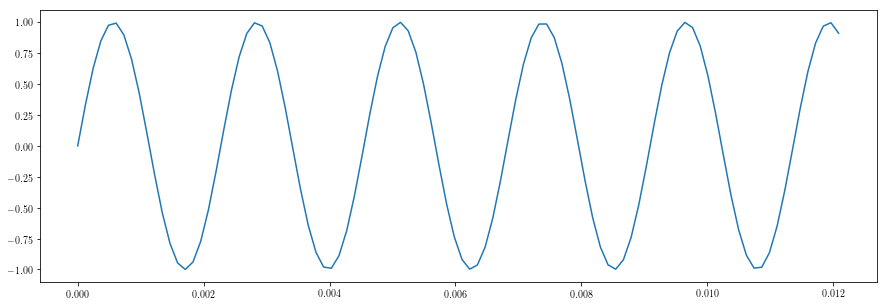

In [10]:
SR = 8192
dur = 3

t = np.arange(0, dur, 1/SR)
fHz = 440

La = np.sin((2*np.pi)*fHz*t)
plt.plot(t[0:100], La[0:100])
plt.show()

ipd.Audio(La, rate=SR)

In [11]:
SR = 8192
dur = 3

t = np.arange(0, dur, 1/SR)
fHz = 440

La = np.sin((2*np.pi)*fHz*t)
# plt.plot(t[0:100], La[0:100])
# plt.show()

ipd.Audio(La, rate=SR)

In [12]:
import scipy.io.wavfile as wavfile



In [14]:
# taxa, som = wavfile.read('notebooks/sound1.wav')
# som[:, 1]
# ipd.Audio(som[:, 0], rate=taxa)

In [15]:
from urllib.request import urlopen
import io



url = 'http://www.presepioelettronico.it/downloads/audio/files/galline.wav'

taxa2, som2 = wavfile.read(io.BytesIO(urlopen(url).read()))

In [16]:
ipd.Audio(som2, rate=taxa2)

In [17]:
SR = 692
dur = 3

t = np.arange(0, dur, 1/SR)
fHz = 440

La = np.sin((2*np.pi)*fHz*t)
# plt.plot(t[0:100], La[0:100])
# plt.show()

ipd.Audio(La, rate=SR)

In [18]:
def quantizarSinal(xs, ts, nbits):

    Q = 2**nbits
    
    min_xs = min(xs)
    max_xs = max(xs)
    
    norm = (max_xs - min_xs)
    
    xs_norm = (xs - min_xs)/norm
    
    xq_norm = (np.floor(Q*xs_norm))/Q
    
    xq = norm*xq_norm + min_xs
    
    plt.plot(ts, xq, '.-')
    
    plt.show()
    
    return xq

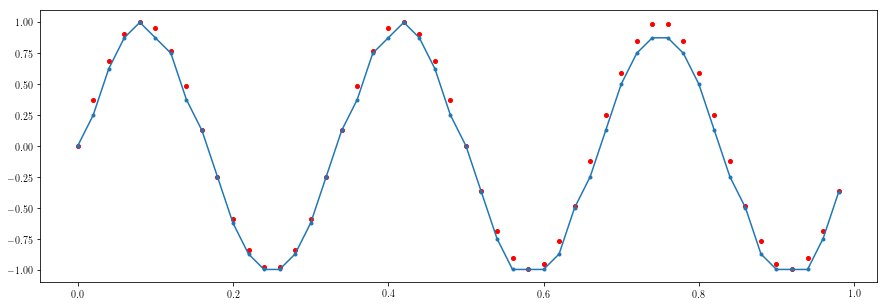

In [19]:
plt.plot(ta, xa, '.', color='r', ms=8)
x_quant = quantizarSinal(xa, ta, 4)

In [20]:
mhl = np.array([1., 2., 3.])

def expande(x, M):
    
    x_exp = np.zeros(M*len(x))

    for i in range(len(x)):
            x_exp[M*i:M*i+M]=x[i]
            
    return x_exp


mhl_exp = expande(mhl, 6)
print(mhl)
print(mhl_exp)

[1. 2. 3.]
[1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3.]


In [21]:
T

200

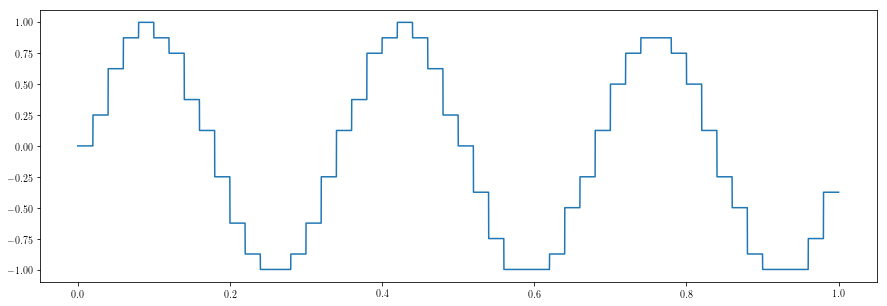

In [22]:
dt = 0.0001
tan = np.arange(0, 1, dt)

x_quant_exp = expande(x_quant, T)
plt.plot(tan, x_quant_exp)

In [23]:
from imageio import imread

Text(0.5, 1.0, 'Marimba de Vidro')

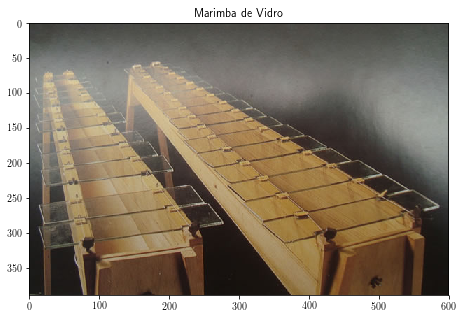

In [24]:
url = "https://marimblog.files.wordpress.com/2010/08/mv3.jpg"
Mar_vidro = imread(urlopen(url).read())
plt.imshow(Mar_vidro)
plt.title('Marimba de Vidro')

Text(0.5, 1.0, 'Marimba de Vidro (tons de cinza)')

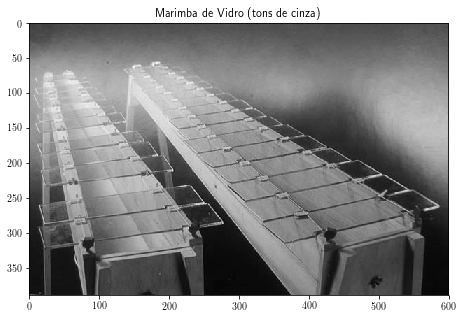

In [25]:
#criando uma cópia
MV = Mar_vidro.copy()
# Extraindo os canais separadamente
MV_R = MV[..., 0]
MV_G = MV[..., 1]
MV_B = MV[..., 2]
# Obtendo a média de RGB, obtendo uma imagem com escala de cinza
Mar_vidro_gray = np.around(np.mean([MV_R, MV_G, MV_B], axis=0)).astype(int)

plt.gray()
plt.imshow(Mar_vidro_gray)
plt.title('Marimba de Vidro (tons de cinza)')

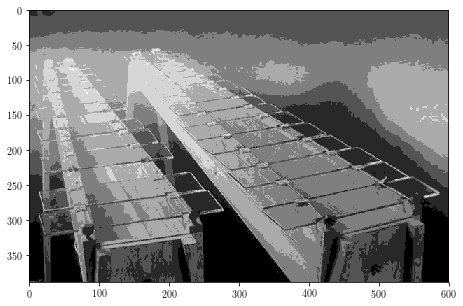

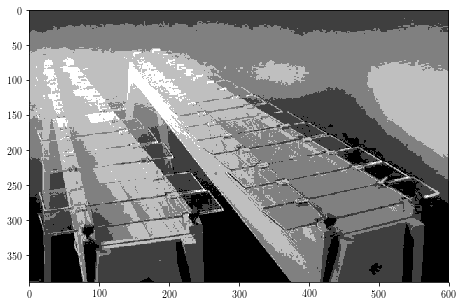

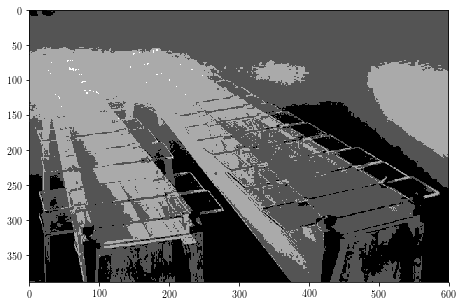

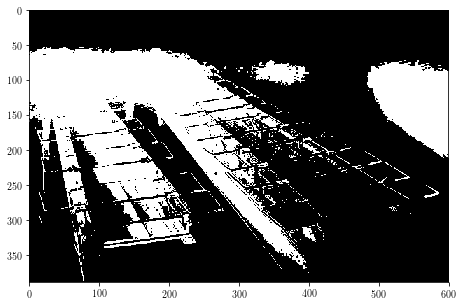

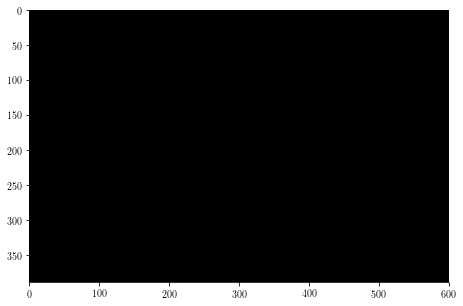

In [26]:
M = Mar_vidro_gray
# Cópia normalizada de M
M_norm = M.copy()/255

# Níveis de quantização
QUANTIZATION = [8, 6, 4, 2, 1]

# Matriz que armazena os vetores quantizados para escutar
# QM = np.zeros(len(f))
# Armazena as respectivas distorções


for Q in QUANTIZATION:
    #Quantiza M_norm 
    qM_norm = np.floor(Q*M_norm)/(Q)
    # Muda o fator de escala [0.,1.] -> [0, 255]
    qM = (qM_norm*255).astype(int)
    # Plota as figuras
    plt.figure()
    plt.imshow(qM)